### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')


In [4]:
data.head(10)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [6]:
import pandas as pd
data.isnull().sum()


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
#Replaced the ranges into the avaerage and then converted the data into numeric data.
#There is lots of data missing for Car.So going to ingore that.
# There is some data missing under Bar, Coffee house, Carry Away, so going to drop that null data while doing the analysis on these.

In [8]:
data["Bar"].value_counts()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [9]:
data["Bar"]=data["Bar"].str.replace("never","0")
data["Bar"]=data["Bar"].str.replace("less1","1")
data["Bar"]=data["Bar"].str.replace("1~3","2")
data["Bar"]=data["Bar"].str.replace("1~3","2")
data["Bar"]=data["Bar"].str.replace("4~8","6")
data["Bar"]=data["Bar"].str.replace("gt8","9")

In [10]:
data["Bar"]=pd.to_numeric(data["Bar"])

In [11]:
data["age"]=data["age"].str.replace("50plus","51")
data["age"]=data["age"].str.replace("below21","20")

In [12]:
data["age"]=pd.to_numeric(data["age"])

In [13]:
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("never","0")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("less1","1")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("1~3","2")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("4~8","6")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("gt8","9")


In [14]:
data["RestaurantLessThan20"]=pd.to_numeric(data["RestaurantLessThan20"])

In [15]:
data['income'].value_counts()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

In [16]:
data["income"]=data["income"].str.replace("$"," ")
data["income"]=data["income"].str.replace("-"," ")
data["income"]=data["income"].str.replace(" ","")
data["income"].value_counts()

income
2500037499       2013
1250024999       1831
3750049999       1805
100000orMore     1736
5000062499       1659
Lessthan12500    1042
8750099999        895
7500087499        857
6250074999        846
Name: count, dtype: int64

In [17]:
data["income"]=data["income"].str.replace("2500037499","31250")
data["income"]=data["income"].str.replace("1250024999","18750")
data["income"]=data["income"].str.replace("3750049999","43750")
data["income"]=data["income"].str.replace("100000orMore","100000")
data["income"]=data["income"].str.replace("5000062499","56250")
data["income"]=data["income"].str.replace("Lessthan12500","12499")
data["income"]=data["income"].str.replace("8750099999","93750")
data["income"]=data["income"].str.replace("7500087499","81250")
data["income"]=data["income"].str.replace("6250074999","68750")
data["income"].value_counts()

income
31250     2013
18750     1831
43750     1805
100000    1736
56250     1659
12499     1042
93750      895
81250      857
68750      846
Name: count, dtype: int64

In [18]:
data["income"]=pd.to_numeric(data["income"])

In [19]:
data['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

In [20]:
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("never","0")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("less1","1")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("1~3","2")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("4~8","6")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("gt8","9")


In [21]:
data["CoffeeHouse"]=pd.to_numeric(data["CoffeeHouse"])

4. What proportion of the total observations chose to accept the coupon? 



In [22]:
proportion = (data['Y'].value_counts()[1]/data['Y'].count())* 100
print(f"Proportion of total accepted coupons is : {proportion} ")

Proportion of total accepted coupons is : 56.84326710816777 


5. Use a bar plot to visualize the `coupon` column.

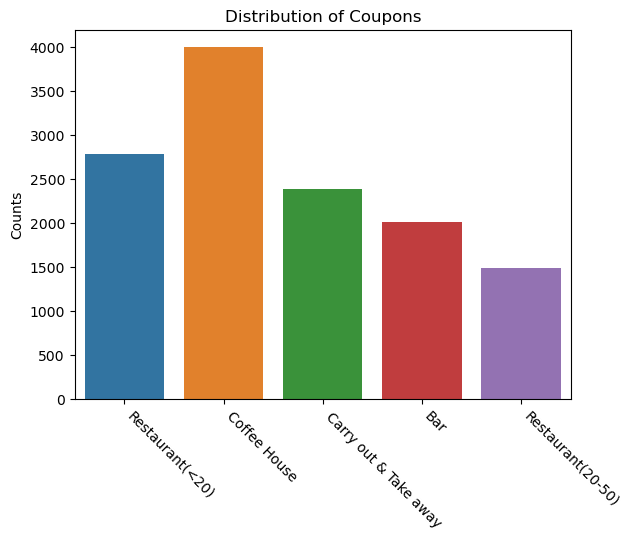

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
ax=sns.countplot(x="coupon", data= data)
plt.title('Distribution of Coupons')
plt.xlabel('')
plt.ylabel('Counts')
plt.xticks(rotation=-45)
ax.set_xticklabels(ax.get_xticklabels(), ha="left")
plt.show()


6. Use a histogram to visualize the temperature column.

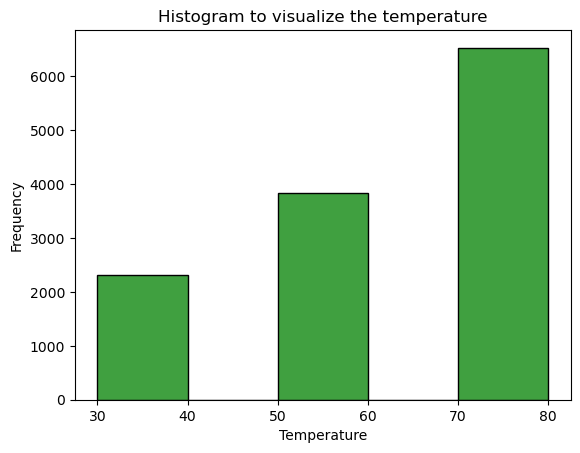

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.histplot(data= data, x="temperature", bins=5, kde=False, color='green')

# Adding labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram to visualize the temperature')

# Displaying the plot
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [25]:
df = data.loc[data['coupon'] == "Bar"]
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,0.0,NaN,6.0,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,0.0,NaN,6.0,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,0.0,NaN,6.0,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,1.0,4~8,6.0,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,1.0,4~8,6.0,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,0.0,1~3,6.0,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,0.0,1~3,6.0,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,0.0,1~3,6.0,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,0.0,1~3,6.0,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [26]:
proportion = (df['Y'].value_counts()[1]/df['Y'].count())* 100
print(f"Proportion of accepted Bar coupons is : {proportion} ")

Proportion of accepted Bar coupons is : 41.00148735746158 


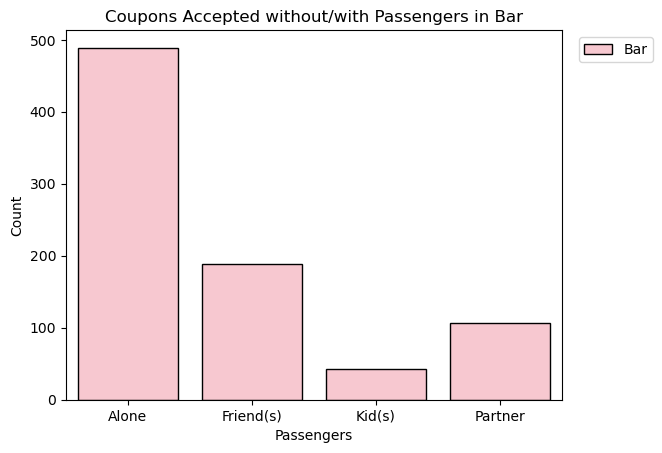

In [27]:
#Plot to show case accepted bar coupons

sns.countplot(x="passanger", data=df.query("Y==1"),hue="coupon", palette=sns.color_palette(['pink']), edgecolor="black")
plt.title('Coupons Accepted without/with Passengers in Bar')
# Set x-axis label
plt.xlabel('Passengers')
# Set y-axis label
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [31]:
#Acceptance rate for those who went to a bar 3 or fewer times a month 

acceptance3=(df.query("Bar<=2 & Y==1")["Bar"].dropna().count())/len(df["Bar"].dropna())*100
print(f"Acceptance rate for those who went to a bar 3 or fewer times a month : {acceptance3} ")

Acceptance rate for those who went to a bar 3 or fewer times a month : 33.366733466933866 


In [35]:
#Acceptance rate for those who went to a bar more than 3 month 

acceptance31=(df.query("Bar>=2 & Y==1")["Bar"].dropna().count())/len(df["Bar"].dropna())*100
print(f"Acceptance rate for those who went to a bar more than 3 times a month : {acceptance31} ")

Acceptance rate for those who went to a bar more than 3 times a month : 20.541082164328657 


In [ ]:
So, it shows that drivers who go less to bar in a month, has the more probability to accept the coupon.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [154]:
#Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 

acceptance4=(df.query("Bar >1 & age>25 & Y==1")["Bar"].dropna().count())/len(df["Bar"].dropna())*100
print(f" Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 : {acceptance4} ")

 Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 : 14.629258517034069 


In [36]:
#Acceptance rate for all others

acceptance41=(df.query("Y==1")["Bar"].dropna().count()-df.query("Bar >1 & age>25 & Y==1")["Bar"].dropna().count())/len(df["Bar"].dropna())*100
print(acceptance41)

26.402805611222448


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [37]:
compare1=(df.query("Bar >1 & passanger!='Kid(s)'& occupation!='Farming Fishing & Forestry' & Y==1")["Bar"].dropna().count()/len(df["Bar"].dropna()))*100
print(f" Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {compare1} ")

 Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 19.68937875751503 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [139]:
#Go to bars more than once a month, had passengers that were not a kid, and were not widowed
compare61=(df.query("Bar>1 & passanger!='Kid(s)'& maritalStatus!='Widowed' & Y==1")["Bar"].count()/len(df["Bar"]))*100
print(f" Acceptance rates between those drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is : {compare61}")

 Acceptance rates between those drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is : 19.484382746653445


In [140]:
#Go to bars more than once a month and are under the age of 30 
compare62=(df.query("Bar>1 & age<30 & Y==1")["Bar"].dropna().count()/len(df["Bar"]))*100
print(f" Acceptance rates between those drivers who go to bars more than once a month and are under the age of 30 is : {compare62}")

 Acceptance rates between those drivers who go to bars more than once a month and are under the age of 30 is : 12.345066931085771


In [141]:
#Go to cheap restaurants more than 4 times a month and income is less than 50K
compare63=(df.query("RestaurantLessThan20>=6 & income<50000 & Y==1")["Bar"].count()/len(df["Bar"]))*100
print(f" Acceptance rates between those drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is : {compare63}")

 Acceptance rates between those drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is : 7.68468021814576


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Looking at the above aceptance rates, we can hypothesize that the drivers who go to bars more than once a month and  that were not a kid, and were not widowed are more likely 
to accept the bar coupon as compared to those drivers who go to bars more than once a month and are under the age of 30. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
Similar to Bar coupons, investigated the Coffee House coupon group.

In [59]:
#Creation of data frame for Coffee House Coupon group
df2 = data.loc[data['coupon'] == "Coffee House"]
df2

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [264]:
df2["passanger"].value_counts()

passanger
Alone        2256
Friend(s)    1228
Partner       305
Kid(s)        207
Name: count, dtype: int64

In [ ]:
Comparison of Passangers who were alone but male vs female for Coffee House

In [270]:
compare8 = (df2.query("passanger =='Alone'& gender == 'Male'  & Y==1")["passanger"].count()/len(df2["passanger"]))*100
print(compare8)

12.787787787787789


In [142]:
compare9 = (df2.query("passanger =='Alone'& gender == 'Female'  & Y==1")["passanger"].count()/len(df2["passanger"]))*100
print(compare9)

11.936936936936938


In [ ]:
Above data shows that Male drivers who went alone are going to accept Coffe house coupons more than the Female Drivers.

In [ ]:
Comparison of Passangers who went with friends but male vs female for Coffee House

In [144]:
compare10 = (df2.query("passanger =='Friend(s)' & gender == 'Male' & Y==1")["passanger"].count()/len(df2["passanger"]))*100
print(compare10)

8.75875875875876


In [145]:
compare11 = (df2.query("passanger =='Friend(s)' & gender == 'Female' & Y==1")["passanger"].count()/len(df2["passanger"]))*100
print(compare11)

9.584584584584585


In [ ]:
Above data shows that Male drivers who went with friends are going to accept Coffe house coupons less than the Female Drivers.

## Independent Investigation on whole data frame


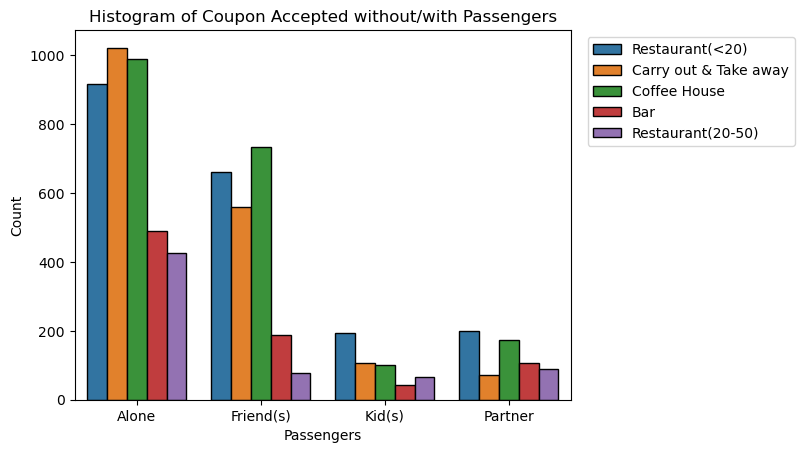

In [79]:
#Comparison of coupons accepted among various Outlets
sns.countplot(x="passanger", data=data.query("Y==1"),hue="coupon", edgecolor="black")
plt.title('Histogram of Coupon Accepted without/with Passengers')
# Set x-axis label
plt.xlabel('Passengers')
# Set y-axis label
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

[Text(0, 0, 'Restaurant(<20)'),
 Text(1, 0, 'Carry out & Take away'),
 Text(2, 0, 'Coffee House'),
 Text(3, 0, 'Bar'),
 Text(4, 0, 'Restaurant(20-50)')]

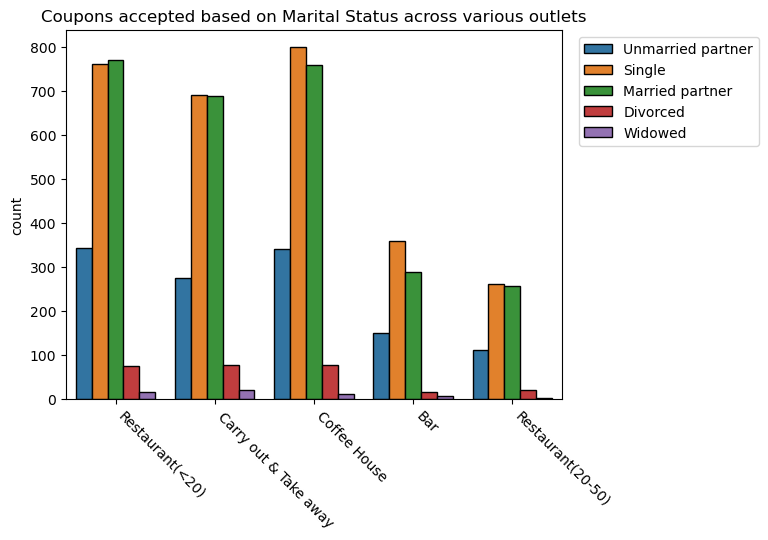

In [38]:
#Comparison of coupons accepted among various Outlets based on marital status
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
ax = sns.countplot(x="coupon", data=data.query("Y==1"),hue = "maritalStatus", edgecolor="black")
plt.title('Coupons accepted based on Marital Status across various outlets')
# Set x-axis label
plt.xlabel('')
# Set y-axis label
plt.ylabel('count')
plt.xticks(rotation=-45)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), ha="left")

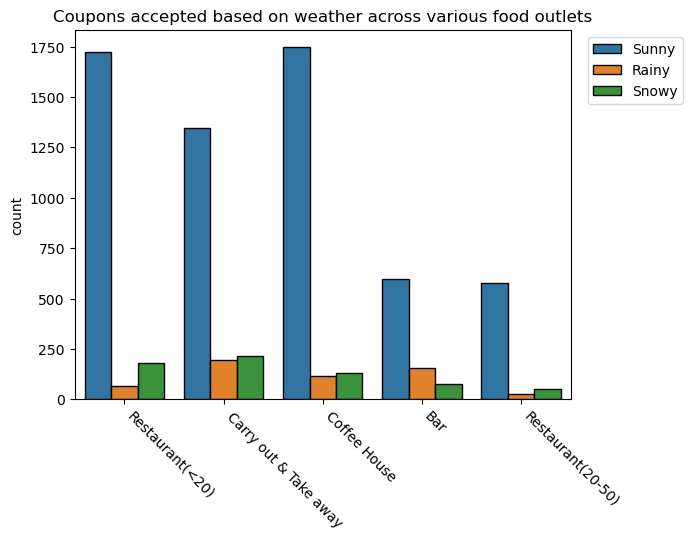

In [73]:
#Comparison of coupons accepted among various Outlets based on weather
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
ax = sns.countplot(x="coupon", data=data.query("Y==1"),hue = "weather", edgecolor="black")
plt.title('Coupons accepted based on weather across various food outlets')
# Set x-axis label
plt.xlabel('')
# Set y-axis label
plt.ylabel('count')
plt.xticks(rotation=-45)
ax.set_xticklabels(ax.get_xticklabels(), ha="left")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

[Text(0, 0, 'Restaurant(<20)'),
 Text(1, 0, 'Carry out & Take away'),
 Text(2, 0, 'Coffee House'),
 Text(3, 0, 'Bar'),
 Text(4, 0, 'Restaurant(20-50)')]

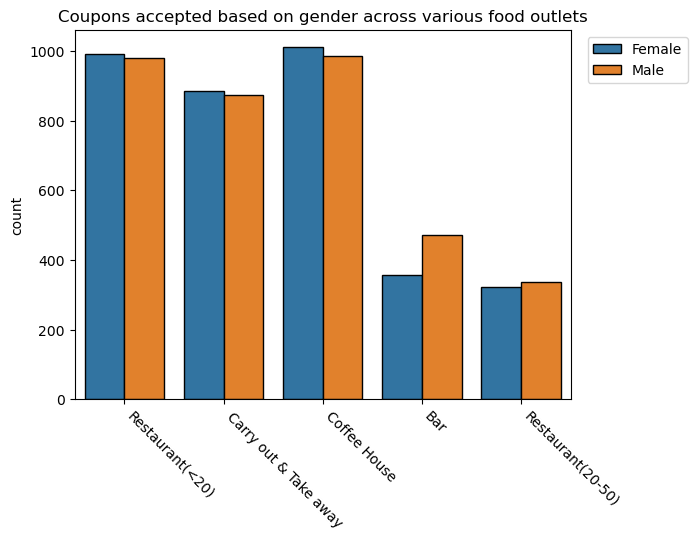

In [74]:
#Comparison of coupons accepted among various Outlets based on gender
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
ax = sns.countplot(x="coupon", data=data.query("Y==1"),hue = "gender", edgecolor="black")
plt.title('Coupons accepted based on gender across various food outlets')
# Set x-axis label
plt.xlabel('')
# Set y-axis label
plt.ylabel('count')
plt.xticks(rotation=-45)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), ha="left")

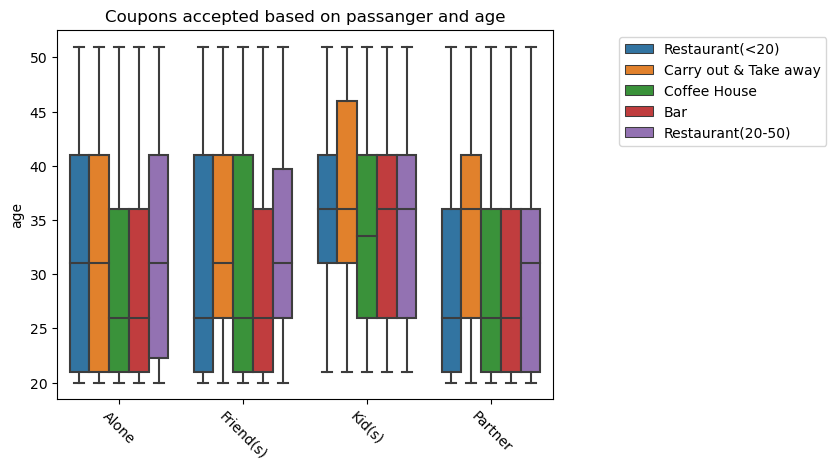

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.boxplot(x='passanger', y='age', data=data.query("Y==1"),hue = "coupon")
plt.title('Coupons accepted based on passanger and age')
# Set x-axis label
plt.xlabel('')
# Set y-axis label
plt.ylabel('age')
plt.xticks(rotation=-45)
plt.legend(bbox_to_anchor=(1.12, 1), loc='upper left')


Recommendations:
1. Passangers with Kids or partners accept coupons less as compared to drivers lone or with friends. So, there should be some Kids friendly or couple friendly coupons so that drivers in that category can accept more coupons.
2. Car data has lots of null data, so need to get better data for further analysis.

    